In [ ]:
# We use numpy (for array related operations) and matplotlib (for plotting) 
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.animation can be used for animating the plots
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


plate_length = 100
max_iter_time = 1000

alpha = 2.0
delta_x = 1

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 500

# Boundary conditions (fixed temperature)
u_top = 900.0
u_left = 200.0
u_bottom = 300.0
u_right = 600.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

In [ ]:
def calculate(u):
  for k in range(0, max_iter_time-1, 1):
    for i in range(1, plate_length-1, delta_x):
      for j in range(1, plate_length-1, delta_x):
        u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]
  return u

In [ ]:
def plotheatmap(u_k, k):
  # Clear the current plot figure
  plt.clf()
  plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
  plt.xlabel("x")
  plt.ylabel("y")
  
  # This is to plot u_k (u at time-step k)
  plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=900)
  plt.colorbar()
  
  return plt

In [ ]:
u = calculate(u)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

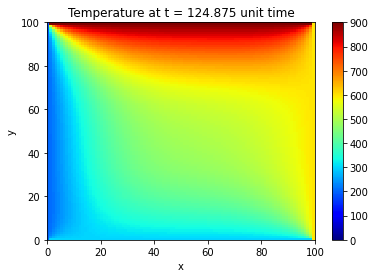

In [ ]:
k=999
plotheatmap(u[k], k)

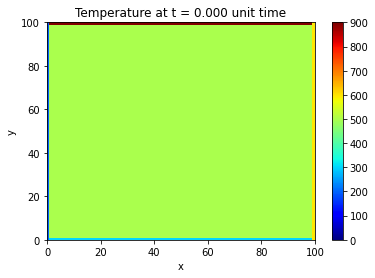

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter 

def animate(k):
  plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
# anim.save("heat_equation_solution.gif")
anim.save("test.mp4")